# 作動関節マニピュレータの逆運動学

Created by Masahiro Furukawa, Aug 18, 2020

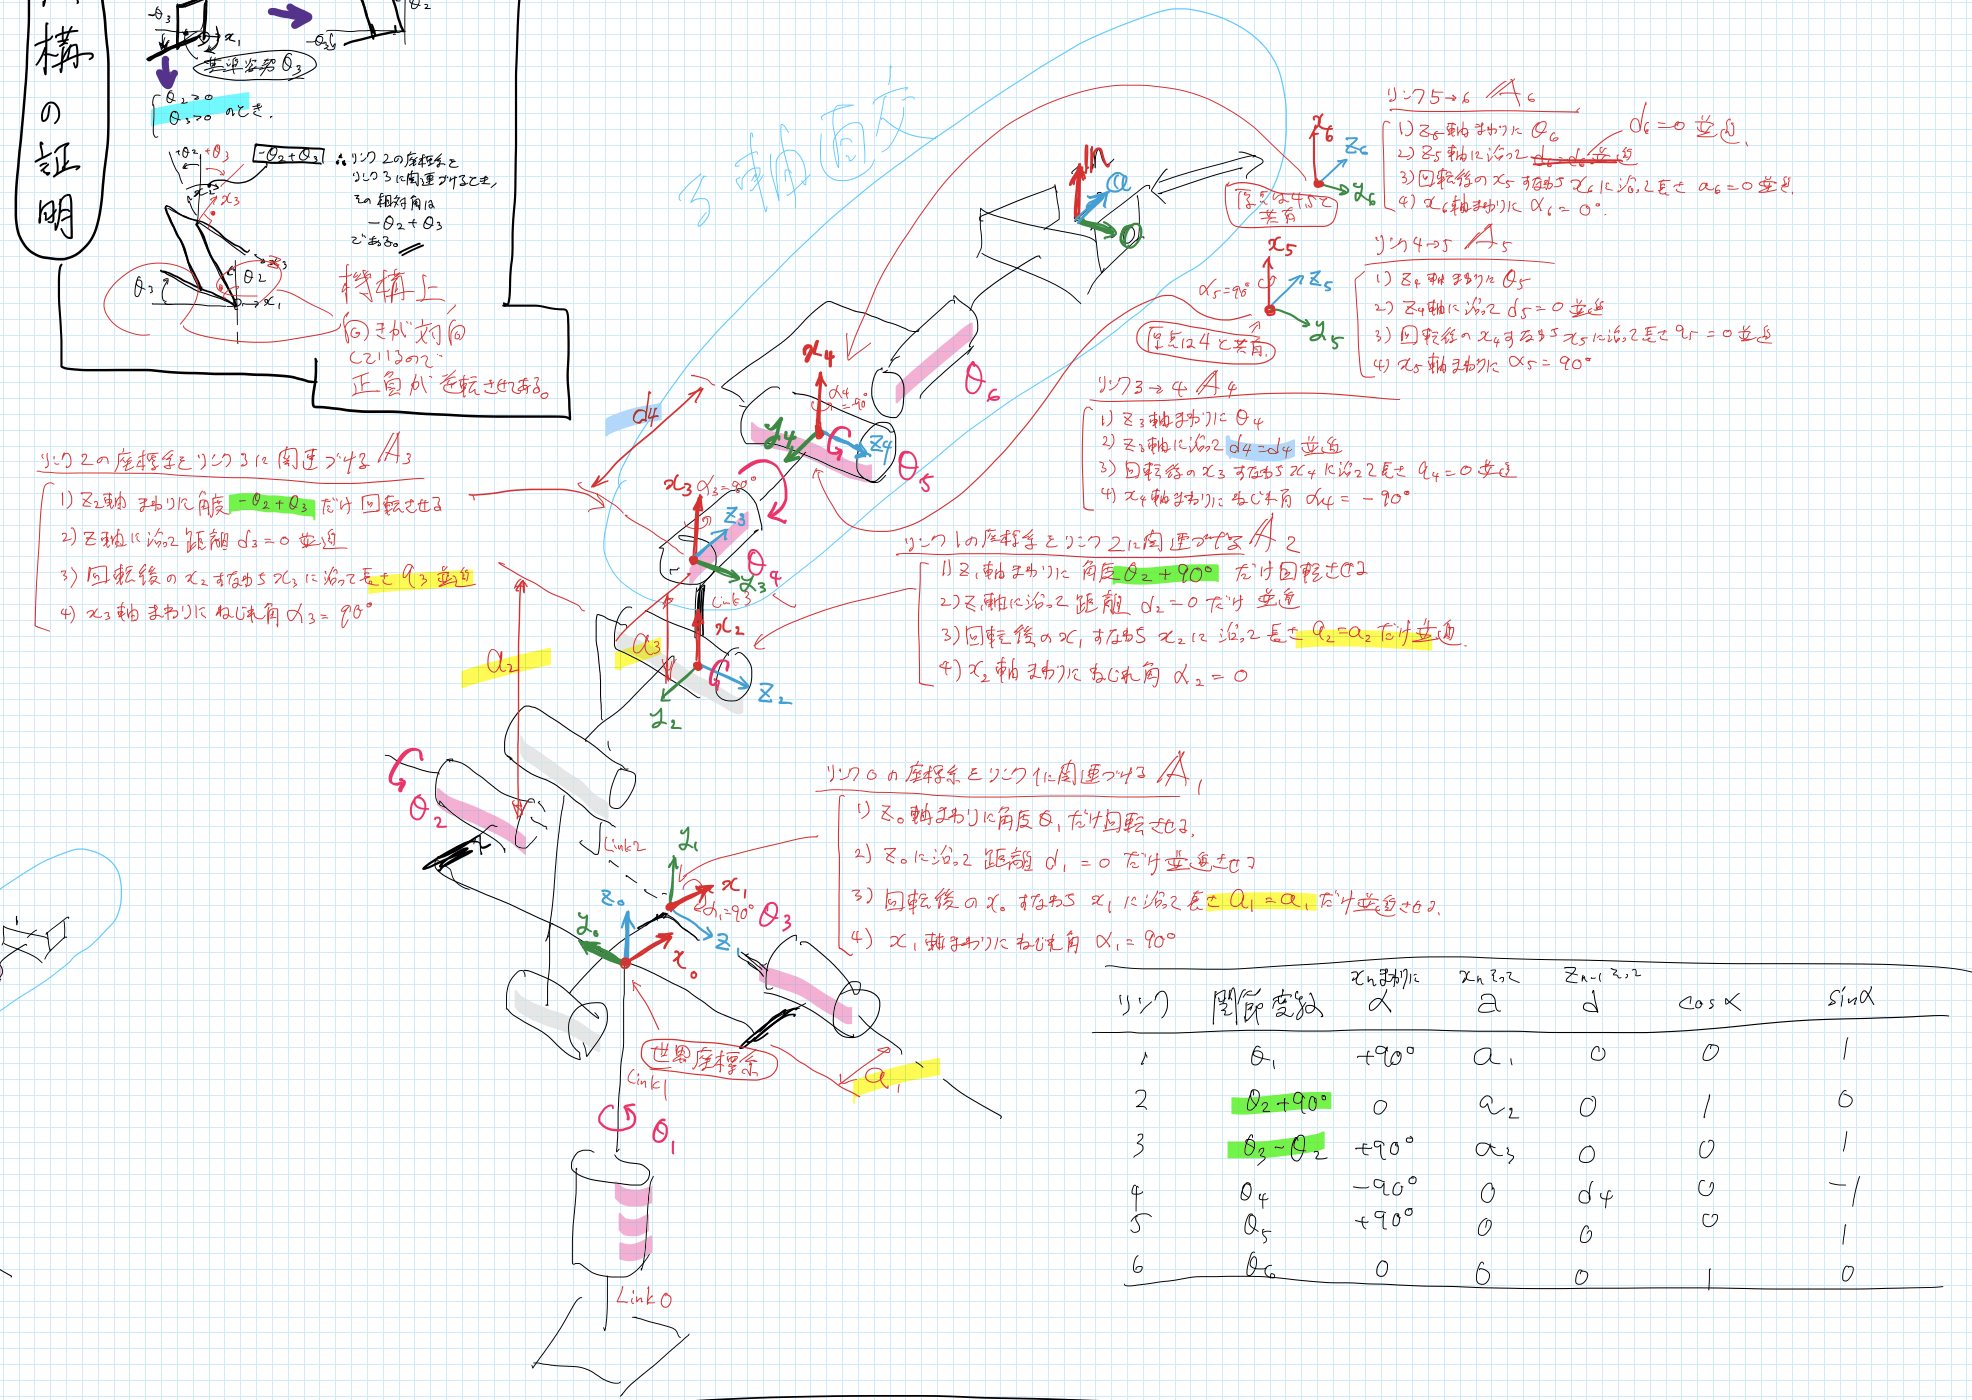

In [163]:
#参考URL -> https://qiita.com/tibigame/items/61cecf86fc978628bfee
#参考図書 -> ポールのロボット・マニピュレータ

import numpy as np
import sympy as sym
sym.init_printing()
Pi = sym.S.Pi # 円周率

#sympyの円周率の方を使うことをすすめる（こっちの方が量子化誤差が大きくなる．numpyも同様に大きい）
import math
pi = math.pi

# 角度変数
(J_1,J_2,J_3,J_4,J_5,J_6) = sym.symbols('J_1,J_2,J_3,J_4,J_5,J_6')

# リンクパラメータ
(a_1,a_2,a_3,d_4) = sym.symbols('a_1,a_2,a_3,d_4')

# リンクパラメータ
(j,a,d,alpha) = sym.symbols('j,a,d,alpha')

# T6
(n_x, n_y, n_z, o_x, o_y, o_z, a_x, a_y, a_z, p_x, p_y, p_z) = sym.symbols('n_x, n_y, n_z, o_x, o_y, o_z, a_x, a_y, a_z, p_x, p_y, p_z')

In [2]:
#sin.cosの簡易記述用
def S(a):
    return sym.sin(a)

def C(a):
    return sym.cos(a)

In [3]:
#回転・並進行列
def rotx(a):
    return sym.Matrix([[1, 0, 0, 0], [0, C(a), -S(a), 0], [0, S(a), C(a), 0], [0, 0, 0, 1]])

def roty(a):
    return sym.Matrix([[C(a), 0, S(a), 0], [0, 1, 0, 0], [-S(a), 0, C(a), 0], [0, 0, 0, 1]])

def rotz(a):
    return sym.Matrix([[C(a), -S(a), 0, 0], [S(a), C(a), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

def trans(x, y, z):
    return sym.Matrix([[1, 0, 0, x], [0, 1, 0, y], [0, 0, 1, z], [0, 0, 0, 1]])

# DH matrix 
def DH(j, alpha, a, d):
    return rotz(j)*trans(a,0,d)*rotx(alpha)

# inverse DH matrix
def DHi(j, alpha, a, d):
    return rotx(-alpha)*trans(-a,0,-d)*rotz(-j)

### DH法に基づく座標系間の関係表現

|座標系 i|Z_i-1軸回りに角度θ_i|X_i軸周りにねじれ角α_iだけ回転|回転後のX_i-1 (=X_i)に沿って長さa_iだけ並進|Z_i-1に沿って距離d_iだけ並進|
|-|-|-|-|-|
|1|$J_1$|$\pi/2$|$a_1$|0|
|2|$J_2+\pi/2$|0|$a_2$|0|
|3|$J_3-J_2$|$\pi/2$|$a_3$|0|
|4|$J_4$|$-\pi/2$|0|$d_4$|
|5|$J_5$|$\pi/2$|0|0|
|6|$J_6$|0|0|0|$

### 変換行列 A

In [4]:
easy=False
if(easy):
    A1=sym.trigsimp( DH (J_1,             Pi/2, 0, 0))
    A3=sym.trigsimp( DH (J_3 - J_2,   Pi/2, 0, 0))
    A1i=sym.trigsimp( DHi (J_1,             Pi/2, 0, 0))
    A3i=sym.trigsimp( DHi (J_3 - J_2,   Pi/2, 0, 0))
else:
    A1=sym.trigsimp( DH (J_1,             Pi/2, a_1, 0))
    A3=sym.trigsimp( DH (J_3 - J_2,   Pi/2, a_3, 0))
    # inverse matrix
    A1i=sym.trigsimp( DHi (J_1,             Pi/2, a_1, 0))
    A3i=sym.trigsimp( DHi (J_3 - J_2,   Pi/2, a_3, 0))

A2=sym.trigsimp( DH (J_2+ Pi/2,       0, a_2, 0))
A4=sym.trigsimp( DH (J_4,            -Pi/2,      0, d_4))
A5=sym.trigsimp( DH (J_5,             Pi/2,      0, 0))
A6=sym.trigsimp( DH (J_6,                   0,     0, 0))

# inverse matrix
A2i=sym.trigsimp( DHi (J_2+ Pi/2,       0, a_2, 0))
A4i=sym.trigsimp( DHi (J_4,            -Pi/2,      0, d_4))
A5i=sym.trigsimp( DHi (J_5,             Pi/2,      0, 0))
A6i=sym.trigsimp( DHi (J_6,                   0,     0, 0))

In [5]:
A1

⎡cos(J₁)  0  sin(J₁)   a₁⋅cos(J₁)⎤
⎢                                ⎥
⎢sin(J₁)  0  -cos(J₁)  a₁⋅sin(J₁)⎥
⎢                                ⎥
⎢   0     1     0          0     ⎥
⎢                                ⎥
⎣   0     0     0          1     ⎦

In [6]:
# 逆行列をかけると単位行列になることの確認
ret = A2i*A2
sym.trigsimp(ret)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

# 逆運動学

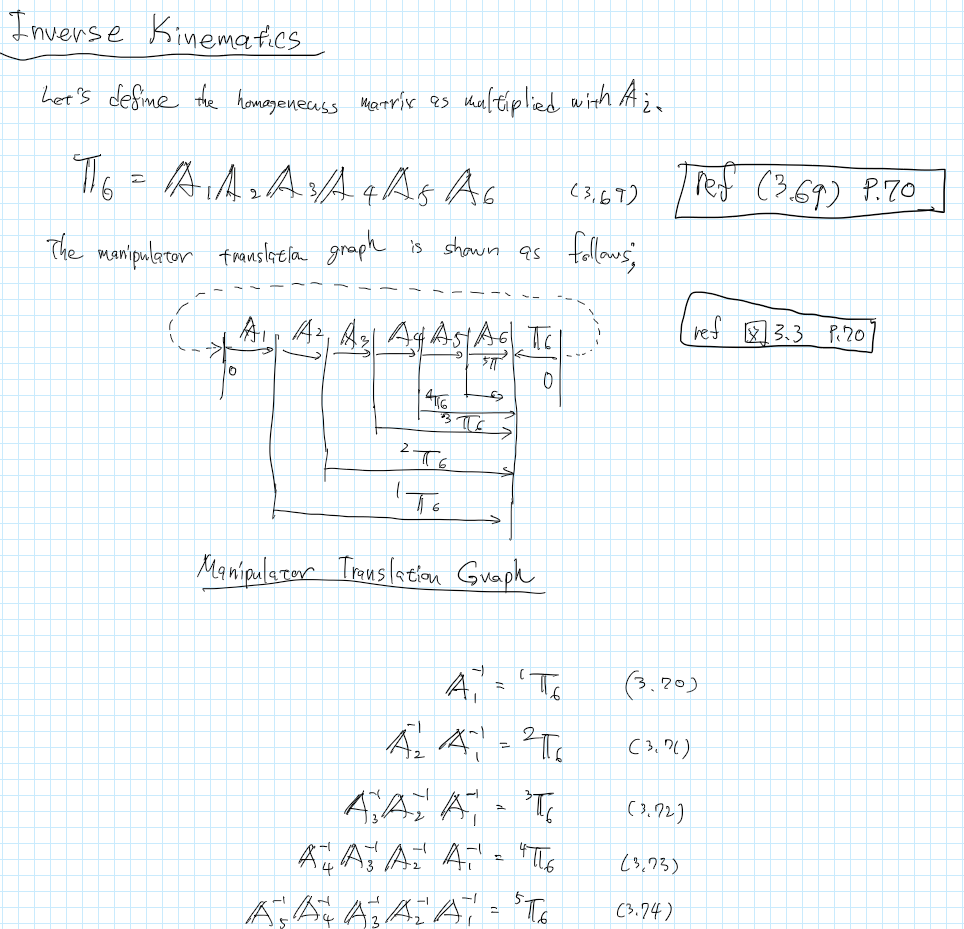

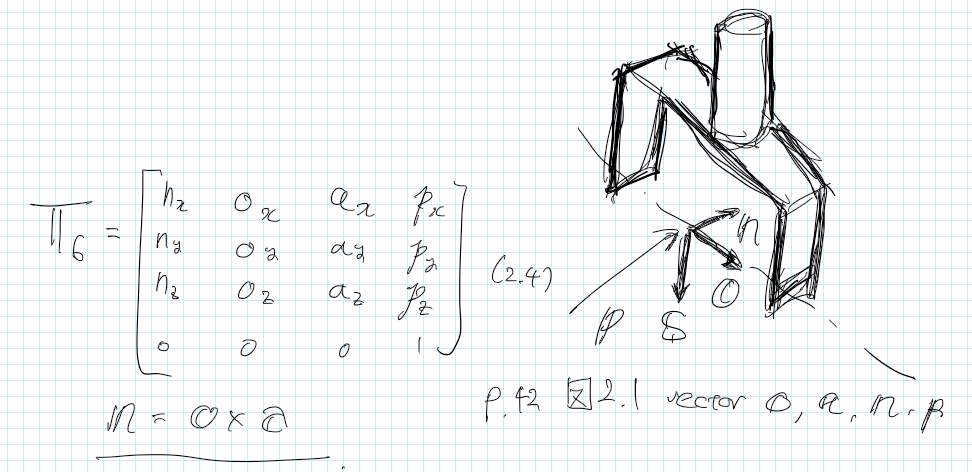

In [7]:
T6=sym.Matrix([[n_x, o_x, a_x, p_x], [n_y, o_y, a_y, p_y], [n_z, o_z, a_z, p_z], [0, 0, 0, 1]])
T6

⎡nₓ   oₓ   aₓ   pₓ ⎤
⎢                  ⎥
⎢n_y  o_y  a_y  p_y⎥
⎢                  ⎥
⎢n_z  o_z  a_z  p_z⎥
⎢                  ⎥
⎣ 0    0    0    1 ⎦

In [8]:
# forward kinematics
A56 = sym.trigsimp( A5*A6 )
A456 = sym.trigsimp( A4*A5*A6 )
A3456 = sym.trigsimp( A3*A4*A5*A6 )
A23456 = sym.trigsimp( A2*A3*A4*A5*A6 )
T  = sym.trigsimp( A1*A2*A3*A4*A5*A6 )

In [9]:
T

⎡((sin(J₁)⋅sin(J₄) - sin(J₃)⋅cos(J₁)⋅cos(J₄))⋅cos(J₅) - sin(J₅)⋅cos(J₁)⋅cos(J₃
⎢                                                                             
⎢(-(sin(J₁)⋅sin(J₃)⋅cos(J₄) + sin(J₄)⋅cos(J₁))⋅cos(J₅) - sin(J₁)⋅sin(J₅)⋅cos(J
⎢                                                                             
⎢                                (-sin(J₃)⋅sin(J₅) + cos(J₃)⋅cos(J₄)⋅cos(J₅))⋅
⎢                                                                             
⎣                                                                      0      

))⋅cos(J₆) + (sin(J₁)⋅cos(J₄) + sin(J₃)⋅sin(J₄)⋅cos(J₁))⋅sin(J₆)   -((sin(J₁)⋅
                                                                              
₃))⋅cos(J₆) + (sin(J₁)⋅sin(J₃)⋅sin(J₄) - cos(J₁)⋅cos(J₄))⋅sin(J₆)  -(-(sin(J₁)
                                                                              
cos(J₆) - sin(J₄)⋅sin(J₆)⋅cos(J₃)                                             
                                                   

### 順運動学計算用Cソースコードを得る

In [10]:
# Masahiro Furukawa
# Aug, 17, 2020
#
# refernce : https://qiita.com/JmpM/items/4bea4997aaf406cca3b4

# Cソースを得る
for ii in range(4):
    for jj in range(4):
        idx = jj*4+ii
        code = sym.ccode(T[idx],assign_to=('Trans['+str(jj)+']['+str(ii)+']'), standard='C89')
        print(code)
    print()

Trans[0][0] = ((sin(J_1)*sin(J_4) - sin(J_3)*cos(J_1)*cos(J_4))*cos(J_5) - sin(J_5)*cos(J_1)*cos(J_3))*cos(J_6) + (sin(J_1)*cos(J_4) + sin(J_3)*sin(J_4)*cos(J_1))*sin(J_6);
Trans[1][0] = (-(sin(J_1)*sin(J_3)*cos(J_4) + sin(J_4)*cos(J_1))*cos(J_5) - sin(J_1)*sin(J_5)*cos(J_3))*cos(J_6) + (sin(J_1)*sin(J_3)*sin(J_4) - cos(J_1)*cos(J_4))*sin(J_6);
Trans[2][0] = (-sin(J_3)*sin(J_5) + cos(J_3)*cos(J_4)*cos(J_5))*cos(J_6) - sin(J_4)*sin(J_6)*cos(J_3);
Trans[3][0] = 0;

Trans[0][1] = -((sin(J_1)*sin(J_4) - sin(J_3)*cos(J_1)*cos(J_4))*cos(J_5) - sin(J_5)*cos(J_1)*cos(J_3))*sin(J_6) + (sin(J_1)*cos(J_4) + sin(J_3)*sin(J_4)*cos(J_1))*cos(J_6);
Trans[1][1] = -(-(sin(J_1)*sin(J_3)*cos(J_4) + sin(J_4)*cos(J_1))*cos(J_5) - sin(J_1)*sin(J_5)*cos(J_3))*sin(J_6) + (sin(J_1)*sin(J_3)*sin(J_4) - cos(J_1)*cos(J_4))*cos(J_6);
Trans[2][1] = -(-sin(J_3)*sin(J_5) + cos(J_3)*cos(J_4)*cos(J_5))*sin(J_6) - sin(J_4)*cos(J_3)*cos(J_6);
Trans[3][1] = 0;

Trans[0][2] = (sin(J_1)*sin(J_4) - sin(J_3)*cos(J_1)*cos(J_4)

# inverse kinematics

$$
    % reference : https://qiita.com/namoshika/items/63db972bfd1030f8264a
    % 空白は表示に影響しない。コメントは"%"で始める
    % 下付き文字は"_a"、上付き文字は"^a"
    % 改行は"\\"を付ける
    {\boldsymbol{A}_{1}}^{-1} \boldsymbol{T}_6 = 
    \boldsymbol{A}_2 
    \boldsymbol{A}_3 
    \boldsymbol{A}_4 
    \boldsymbol{A}_5 
    \boldsymbol{A}_6 　　　(3.75)\\
    {\boldsymbol{A}_{1}}^{-1} \boldsymbol{T}_6 = 
    ^{1}\boldsymbol{T}_6   　　　(3.76)
    % 複数文字を1要素とする際は{...}で囲う
    % 空白は"\quad"
$$

In [11]:
T16 = sym.trigsimp(                         A1i*T6 ) #  eq(3.70)
T26 = sym.trigsimp(                   A2i*A1i*T6 ) #  eq(3.71)
T36 = sym.trigsimp(             A3i*A2i*A1i*T6 ) #  eq(3.72)
T46 = sym.trigsimp(       A4i*A3i*A2i*A1i*T6 ) #  eq(3.73)
T56 = sym.trigsimp( A5i*A4i*A3i*A2i*A1i*T6 ) #  eq(3.74)

In [12]:
# Left hand  of (3.76)
A1iT6 = T16
A1iT6

⎡nₓ⋅cos(J₁) + n_y⋅sin(J₁)  oₓ⋅cos(J₁) + o_y⋅sin(J₁)  aₓ⋅cos(J₁) + a_y⋅sin(J₁) 
⎢                                                                             
⎢          n_z                       o_z                       a_z            
⎢                                                                             
⎢nₓ⋅sin(J₁) - n_y⋅cos(J₁)  oₓ⋅sin(J₁) - o_y⋅cos(J₁)  aₓ⋅sin(J₁) - a_y⋅cos(J₁) 
⎢                                                                             
⎣           0                         0                         0             

 -a₁ + pₓ⋅cos(J₁) + p_y⋅sin(J₁)⎤
                               ⎥
              p_z              ⎥
                               ⎥
    pₓ⋅sin(J₁) - p_y⋅cos(J₁)   ⎥
                               ⎥
               1               ⎦

In [13]:
# Right hand of (3.76)
A23456

⎡-(sin(J₃)⋅cos(J₄)⋅cos(J₅) + sin(J₅)⋅cos(J₃))⋅cos(J₆) + sin(J₃)⋅sin(J₄)⋅sin(J₆
⎢                                                                             
⎢(-sin(J₃)⋅sin(J₅) + cos(J₃)⋅cos(J₄)⋅cos(J₅))⋅cos(J₆) - sin(J₄)⋅sin(J₆)⋅cos(J₃
⎢                                                                             
⎢                  sin(J₄)⋅cos(J₅)⋅cos(J₆) + sin(J₆)⋅cos(J₄)                  
⎢                                                                             
⎣                                      0                                      

)   (sin(J₃)⋅cos(J₄)⋅cos(J₅) + sin(J₅)⋅cos(J₃))⋅sin(J₆) + sin(J₃)⋅sin(J₄)⋅cos(
                                                                              
)  -(-sin(J₃)⋅sin(J₅) + cos(J₃)⋅cos(J₄)⋅cos(J₅))⋅sin(J₆) - sin(J₄)⋅cos(J₃)⋅cos
                                                                              
                     -sin(J₄)⋅sin(J₆)⋅cos(J₅) + cos(J₄)⋅cos(J₆)               
                                                   

$$
\displaystyle A_{1i}T_{6} = A_{23456} \\
$$
より以下の等式群を得る

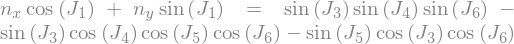

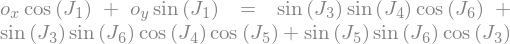

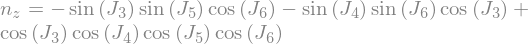

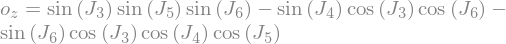

In [25]:
for idx in range(12):
    display(sym.simplify ( sym.expand( sym.Eq( A1iT6[idx], A23456[idx])) ) )

# J1

In [62]:
# このうち位置に関する項のみを抽出すると
for idx in [3,7,11]:
    display(sym.simplify ( sym.expand( sym.Eq( A1iT6[idx], A23456[idx])) ) )

In [28]:
# の３元連立方程式を得る．　上記第３式は，
sym.Eq(A1iT6[11] , A23456[11])

## p_x = 0 なら直ちに

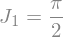

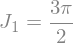

2 equation(s) in total


In [195]:
sol = sym.solve(p_y * C(J_1), J_1)

for i  in range(len(sol)):
    display( sym.simplify(sym.Eq(J_1,  sol[i])))
print( str(len(sol)) +' equation(s) in total')

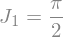

'where p_x = 0'

In [169]:
# しかし値域(-PI < J1 < PI)より , p_x = 0 なら直ちに
sol = sym.solve(p_y * C(J_1), J_1)

for i  in range(len(sol)):
    if -Pi < sol[0] and sol[i] < Pi:        
        display( sym.simplify(sym.Eq(J_1,  sol[i])), 'where p_x = 0')

## p_y = 0 なら直ちに

In [170]:
sol = sym.solve(p_x * S(J_1), J_1)

for i  in range(len(sol)):
    display( sym.simplify(sym.Eq(J_1,  sol[i])))
print( str(len(sol)) +' equation(s) in total')

2 equation(s) in total


In [171]:
# であるが，　同様に値域(-PI < J1 < PI)より , p_y = 0 なら直ちに
sol = sym.solve(p_x * S(J_1), J_1)

for i  in range(len(sol)):
    if -Pi < sol[0] and sol[i] < Pi:        
        display( sym.simplify(sym.Eq(J_1,  sol[i])) ,  'where p_y = 0')

'where p_y = 0'

## p_x != 0 であることが確定したならば，

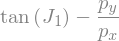

In [191]:
# 両辺をp_xで割ることができ，
# p_x != 0 ならば 前述の通りC(J1) != 0であることが必然的に求まるためC(J1)で両辺を割っていいため，
eq =sym.simplify((A1iT6[11] - A23456[11])/p_x/C(J_1))
display(eq)

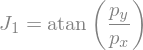

'where p_x != 0'

In [192]:
# この方程式をJ1について解くと，
sol = sym.solve(eq, J_1)
for i  in range(len(sol)):  
        display( sym.simplify(sym.Eq(J_1,  sol[i])) ,  'where p_x != 0')

がJ1に関する解析解である．

# J2

In [29]:
# 次に上記第２式に着目すると
sym.Eq(A1iT6[7] , A23456[7])

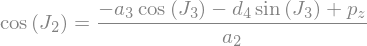

1 equation(s) in total


In [85]:
# であるから,上記第１式に S(J2) を代入すべく C(J2)を求めると
eq_C2 =A1iT6[7] - A23456[7]
sol = sym.solve( eq_C2, C(J_2)  )
for i  in range(len(sol)):
    display( sym.Eq(C(J_2),  sol[i]))
print( str(len(sol)) +' equation(s) in total')

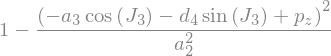

In [77]:
# 従って，S(J2)を求めるためには，C(J2)**2 + S(J2)**2 = 1 を展開し
# S(J2) = sqrt(1-C(J2)**2) を行いたいので，
# まずは平方根を取る前に平方根内部の正負を確認する

# 前記右辺を S(J2)**2 = 1- C(J2)**2 に代入し，これをKとおく
K = 1 - sol[0]**2
display(K)

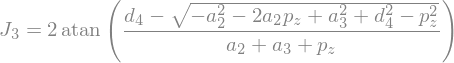

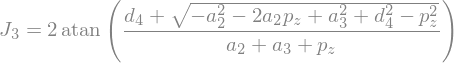

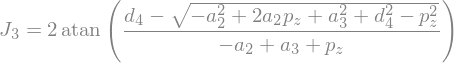

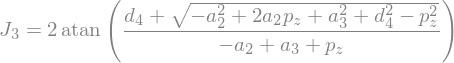

4 equation(s) in total


In [102]:
# もしKが負(K<0)であればJ3に対する解は存在しない．従ってJ2も求まらない．しかしJ3が未定なため，このままでは判別式を評価し得ない．
# もし K=0 であれば，直ちにJ3が求まり，
sol = sym.solve( sym.trigsimp(K), J_3  )
for i  in range(len(sol)):
    display( sym.Eq(J_3,  sol[i]))
print( str(len(sol)) +' equation(s) in total')

In [109]:
# しかしやはり現時点ではKの正負を評価し得ない．そこでK>0と仮定してS(J2)を導出することにする.
# 再度標的となる式を再掲すると，
display(sym.Eq(A1iT6[3] , A23456[3]))

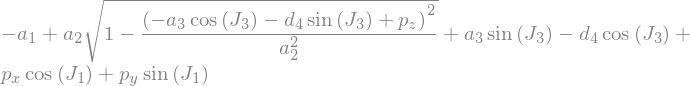

In [131]:
# ここでS(J2) = sqrt(K) であるから
eq = A1iT6[3] - A23456[3]
# これを上式に代入すると
eq = eq.subs(S(J_2) , sym.sqrt(K))
display(eq)

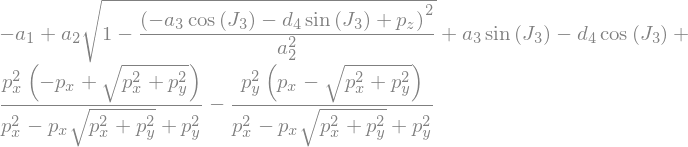

In [135]:
# を得る
eq = eq.subs(J_1, sol_J1[0])
# これを上式に代入すると
display(sym.trigsimp(eq))

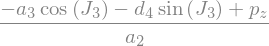

If ( 1 - (p_z - a_3 * C(J_3) - d_4 * S(J_3) )**2 < 0, then no answer.

If ( 1 - (p_z - a_3 * C(J_3) - d_4 * S(J_3) )**2 ==0 , then 


Solusion on J_3 equals to the below


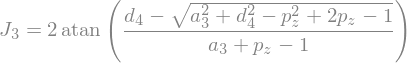

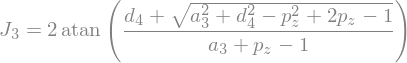

If ( 1 - (p_z - a_3 * C(J_3) - d_4 * S(J_3) )**2 >0 , then 


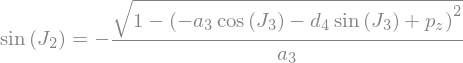

Here is the equation below


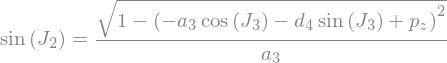

In [68]:
eq_S2p =  (sym.sqrt( 1 - ( p_z - a_3*C(J_3)-d_4*S(J_3) )*( p_z - a_3*C(J_3)-d_4*S(J_3) )) ) / a_3
eq_S2n = -eq_S2p

display( sym.Eq(S(J_2), eq_S2n ) )

print("Here is the equation below")

eq = sym.Eq(A1iT6[3] , A23456[3]) 
display( sym.collect( eq, S(J_3) ) )
display( sym.collect( sym.Eq(A1iT6[7] , A23456[7]) , S(J_3) ) )
display( sym.Eq(S(J_2), eq_S2p ) )

In [61]:
eq3 = A23456[3] - A1iT6[3]
eq7 = A23456[7] - A1iT6[7]

print("Here is the equation below\n eq3 = ")
display( sym.collect(eq3, S(J_3) ) )
print("eq7 = ")
display( sym.collect(eq7, S(J_3) ) )

(H3, K3, A3, B3, C3, D3) = sym.symbols('H3, K3, A3, B3, C3, D3')
H3 = -a_1+p_x*C(J_1)+p_y*S(J_1)
K3 = p_z

display(H3)

eq_J3 = -a_2**2 + (-H -a_3*S(J_3)+d_4*C(J_3)) **2 + (K-a_3*C(J_3)-d_4*S(J_3)) **2
sym.collect(sym.trigsimp(sym.expand(eq_J3)), [C(J_3), S(J_3)])


Here is the equation below
 eq3 = 


eq7 = 


NameError: name 'H' is not defined

In [ ]:
# eq2 (3.76)
sym.simplify ( sym.expand( sym.Eq(
    A1iT6[3]*A1iT6[3] + A1iT6[7]*A1iT6[7],
    A23456[3]* A23456[3] + A23456[7]*A23456[7]) ) )

In [ ]:
# eq2 (3.76)
sym.simplify ( sym.expand( sym.Eq(A1iT6[7]*A1iT6[7] , A23456[7]*A23456[7]) ) )

In [ ]:
T36

In [ ]:
A456

In [ ]:
# eq2 (3.76)
for idx in [3,11]:
    display(sym.simplify ( sym.expand( sym.Eq( T36[idx]*T36[idx], A456[idx]* A456[idx])) ) )

In [ ]:
# eq2 (3.76)
display(sym.trigsimp ( sym.expand( sym.Eq( T36[3]*T36[3] - T36[11]*T36[11], A456[3]* A456[3]-A456[11]* A456[11])) ) )

In [ ]:
# eq2 (3.76)
idx=6
sym.Eq(A456[idx] , T36[idx])

In [ ]:
sym.trigsimp(             A1*A2*A3*A4)

In [ ]:
sym.trigsimp(            A5i*A6i*T6)